In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data=pd.read_csv('./HungarianChickenPox/hungary_chickenpox.csv')

In [14]:
week_total=data.sum(1)

In [10]:
data_county=pd.read_csv('./HungarianChickenPox/hungary_county_edges.csv')

In [11]:
data_county

,name_1,name_2,id_1,id_2
0,BACS,JASZ,0,10
1,BACS,BACS,0,0
2,BACS,BARANYA,0,1
3,BACS,CSONGRAD,0,5
4,BACS,PEST,0,13
...,...,...,...,...
97,VESZPREM,SOMOGY,18,14
98,ZALA,VAS,19,17
99,ZALA,ZALA,19,19
100,ZALA,SOMOGY,19,14


In [19]:
df=pd.DataFrame.from_dict({'a':[1,2,3],'b':[5,6,7]})

In [26]:
x=df['a'].copy()

In [27]:
x.iloc[0]=21

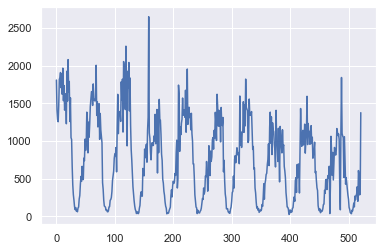

In [32]:
week_total.plot()
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

In [45]:
data=pd.concat([week_total[:-1].reset_index(drop=True),week_total[1:].reset_index(drop=True)],axis=1).rename(columns={0:'x',1:'y'})

In [46]:
data

,x,y
0,1807,1407
1,1407,1284
2,1284,1255
3,1255,1478
4,1478,1816
...,...,...
516,201,608
517,608,536
518,536,286
519,286,299


In [47]:
from sklearn.ensemble import AdaBoostRegressor

In [48]:
l=int(data.shape[0]*0.8)
xtrain=data['x'][:l]
ytrain=data['y'][:l]

xtest=data['x'][l:]
ytest=data['y'][l:]

In [49]:
ada=AdaBoostRegressor(n_estimators=100)

In [52]:
ada.fit(xtrain.values.reshape(-1,1),ytrain)

AdaBoostRegressor(n_estimators=100)

In [54]:
ada.score(xtest.values.reshape(-1,1),ytest)

0.499092191008667

In [55]:
ypred=ada.predict(xtest.values.reshape(-1,1))

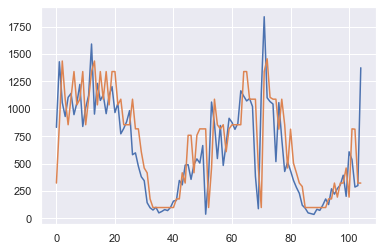

In [58]:
plt.plot(ytest.values)
plt.plot(ypred)